# **Section 1 project** 

# **Introduction to Data Science**

## **1. Exploratory Data Analysis**

- 결측치 확인
- 중복값 확인
- 데이터 타입 확인
- 데이터 정제


### **1-0. 데이터 로드**

In [232]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: ignored

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('vgames2.csv', index_col = 0)

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df_copy = df.copy()

### **1-1. 결측치 확인**

In [ ]:
df_copy.isnull().sum()

데이터가 16000개 이상 있으므로 결측치는 제거한다.

In [ ]:
df_copy[df_copy['Year'].isnull()]

In [ ]:
df_copy[df_copy['Genre'].isnull()]

In [ ]:
df_copy[df_copy['Publisher'].isnull()]

In [ ]:
df_copy = df_copy.dropna()

### **1-2. 중복값 확인**

In [ ]:
df_copy[df_copy.duplicated()]

중복값은 없다.

### **1-3. 데이터 타입 확인**

In [ ]:
df_copy.head()

In [ ]:
df_copy.info()

 Year를 float64에서 int64로 바꾼다.

 NA_Sales, EU_Sales, JP_Sales, Other_Sales 들을 object에서 float64로 바꾼다.

In [ ]:
import re

In [ ]:
def has_errors(inputString):
  return bool(re.search('[^0-9.]', inputString))

In [ ]:
error_condition_NA = df_copy.NA_Sales.apply(has_errors)
error_name_NA = df_copy[error_condition_NA]
error_name_NA

In [ ]:
error_condition_EU = df_copy.EU_Sales.apply(has_errors)
error_name_EU = df_copy[error_condition_EU]
error_name_EU

In [ ]:
error_condition_JP = df_copy.JP_Sales.apply(has_errors)
error_name_JP = df_copy[error_condition_JP]
error_name_JP

In [ ]:
error_condition_Other = df_copy.Other_Sales.apply(has_errors)
error_name_Other = df_copy[error_condition_Other]
error_name_Other

우리는 이 데이터에서 K와 M의 뜻을 알 수 없다. 따라서 단순히 제거해 주도록 하자.

In [ ]:
df_copy.NA_Sales = df_copy.NA_Sales.str.replace('[MK]', '', regex=True)
df_copy.EU_Sales = df_copy.EU_Sales.str.replace('[MK]', '', regex=True)
df_copy.JP_Sales = df_copy.JP_Sales.str.replace('[MK]', '', regex=True)
df_copy.Other_Sales = df_copy.Other_Sales.str.replace('[MK]', '', regex=True)
df_copy.NA_Sales = df_copy.NA_Sales.str.replace('[MK]', '', regex=True)
df_copy.EU_Sales = df_copy.EU_Sales.str.replace('[MK]', '', regex=True)
df_copy.JP_Sales = df_copy.JP_Sales.str.replace('[MK]', '', regex=True)
df_copy.Other_Sales = df_copy.Other_Sales.str.replace('[MK]', '', regex=True)

In [ ]:
error_condition = df_copy.Other_Sales.apply(has_errors)

In [ ]:
error_names = df_copy[error_condition]
error_names

In [ ]:
df_copy = df_copy.astype({'Year':'int64','NA_Sales':'float64','EU_Sales':'float64','JP_Sales':'float64','Other_Sales':'float64'})

In [ ]:
df_copy.info()

데이터 타입도 확인되었으니 샘플을 여러번 뽑아보면서 눈으로 이상한 것이 없는지 확인한다.

In [ ]:
df_copy.sample(5)

In [ ]:
df_copy.describe()

year의 min 값이 0인 자료가 있다.

In [ ]:
df_copy[df_copy.Year == 0]

In [ ]:
df_copy[df_copy.Year <= 1800]

1800년 이전에 전자오락이 나왔을리 없으므로 삭제해준다.

In [ ]:
df_drop = df_copy.drop(df_copy[df_copy.Year <= 1800].index)

In [ ]:
df_drop

In [ ]:
df_drop.describe()

In [ ]:
plt.hist(df_drop.NA_Sales[df_drop.NA_Sales < 20])

In [ ]:
df_drop.NA_Sales[df_drop.NA_Sales < 20].max()

In [ ]:
less_16 = df_drop[df_drop.NA_Sales < 16]
larger_16 = df_drop[df_drop.NA_Sales >= 16]

In [ ]:
len(larger_16) / len(less_16)

NA_Sales column에서 16 이상의 값이 0.44% 밖에 되지 않기 때문에 이상치로 판단하고 삭제한다.

In [ ]:
df_drop = df_drop.drop(index = df_drop[df_drop.NA_Sales >= 16].index)

In [ ]:
df_drop.describe()

In [ ]:
plt.hist(df_drop.EU_Sales[df_drop.EU_Sales < 16])

In [ ]:
less_16 = df_drop[df_drop.EU_Sales < 16]
larger_16 = df_drop[df_drop.EU_Sales >= 16]

In [ ]:
len(larger_16) / len(less_16)

EU_Sales column에서 16 이상의 값이 0.37% 밖에 되지 않기 때문에 이상치로 판단하고 삭제한다.

In [ ]:
df_drop = df_drop.drop(index = df_drop[df_drop.EU_Sales >= 16].index)

In [ ]:
df_drop.describe()

In [ ]:
plt.hist(df_drop.EU_Sales[df_drop.JP_Sales < 16])

In [ ]:
less_16 = df_drop[df_drop.JP_Sales < 16]
larger_16 = df_drop[df_drop.JP_Sales >= 16]

In [ ]:
len(larger_16) / len(less_16)

JP_Sales column에서 16 이상의 값이 0.22% 밖에 되지 않기 때문에 이상치로 판단하고 삭제한다.

In [ ]:
df_drop = df_drop.drop(index = df_drop[df_drop.JP_Sales >= 16].index)

In [ ]:
df_drop.describe()

In [ ]:
plt.hist(df_drop.EU_Sales[df_drop.Other_Sales < 16])

In [ ]:
less_16 = df_drop[df_drop.Other_Sales < 16]
larger_16 = df_drop[df_drop.Other_Sales >= 16]

In [ ]:
len(larger_16) / len(less_16)

Other_Sales column에서 16 이상의 값이 0.22% 밖에 되지 않기 때문에 이상치로 판단하고 삭제한다.

In [ ]:
df_drop = df_drop.drop(index = df_drop[df_drop.Other_Sales >= 16].index)

In [ ]:
df_drop.describe()

In [ ]:
df_drop.groupby('Year').size()

2017년도와 2020년도의 데이터가 너무 적어서 분석에 오히려 오류를 만들 수 있다.

따라서 4개의 자료를 삭제하도록 한다.

In [ ]:
df_drop = df_drop.drop(index = df_drop[df_drop.Year == 2017].index)
df_drop = df_drop.drop(index = df_drop[df_drop.Year == 2020].index)

- 마지막으로 인덱스를 리셋시켜 준다.

In [ ]:
df_clean = df_drop.copy().reset_index(drop=True)

In [ ]:
df_clean

## **2. Data Description**

앞선 과정을 통해 정제된 데이터 df_clean을 얻을 수 있었다.

다음은 각 column이 가진 특성과 값에 대한 이해를 해보자.

In [59]:
df_clean.sample(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1482,Stacked with Daniel Negreanu,XB,2006,Misc,Myelin Media,0.02,0.01,0.00,0.00
9817,Banjo-Tooie,N64,2000,Platform,Nintendo,0.82,0.36,0.25,0.06
14464,Brothers in Arms: Furious 4,PS3,2012,Shooter,Ubisoft,0.01,0.05,0.00,0.02
7566,L.A. Noire,X360,2011,Adventure,Take-Two Interactive,1.52,0.94,0.02,0.24
6461,Super Robot Taisen: Scramble Commander,PS2,2003,Strategy,Banpresto,0.00,0.00,0.19,0.00


Name : 게임의 이름입니다.

Platform : 게임이 지원되는 플랫폼의 이름입니다.

Year : 게임이 출시된 연도입니다.

Genre : 게임의 장르입니다.

Publisher : 게임을 배급한 회사입니다.

NA_Sales : 북미지역에서의 출고량입니다.

EU_Sales : 유럽지역에서의 출고량입니다.

JP_Sales : 일본지역에서의 출고량입니다.

Other_Sales : 기타지역에서의 출고량입니다.

우리는 어떤 플랫폼이 있는지, 연도별 게임이 얼마나 나왔는지, 장르별 게임은 얼마나 있는지 등을 파악해 볼 수 있다.

In [96]:
game = df_clean.copy()

분석을 위해 전세계 출고량을 나타내는 열을 추가하자.

In [97]:
global_sales = []
for i in game.index:
    g_sales = game.loc[i, 'NA_Sales' : 'Other_Sales'].sum()
    global_sales.append(round(g_sales, 2))
game['Global_Sales'] = global_sales
game.head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
5,Power Pro Kun Pocket 8,DS,2005,Sports,Konami Digital Entertainment,0.00,0.00,0.14,0.00,0.14
6,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,0.02,0.01,0.00,0.00,0.03
7,Samurai Warriors: State of War,PSP,2005,Action,Tecmo Koei,0.07,0.00,0.11,0.01,0.19
8,Imabikisou,PS3,2007,Adventure,Sega,0.00,0.00,0.04,0.00,0.04
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,0.04,0.03,0.00,0.01,0.08


### **2-1 장르별 분석**

장르별 선호도를 알아보기 위해 이를 다각도에서 분석해보자.

In [99]:
game_genre = game[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
game_genre_sum = game_genre.groupby(['Genre']).sum()
game_table = game_genre_sum.reset_index()

game_table.columns = ['Genre', 'NA Sales', 'EU Sales', 'JP Sales', 'Other Sales']
game_table.head()

,Genre,NA Sales,EU Sales,JP Sales,Other Sales
0,Action,834.05,510.60,161.56,190.01
1,Adventure,100.49,72.64,61.23,16.45
2,Fighting,216.26,97.39,84.36,45.54
3,Misc,386.31,204.62,113.48,81.30
4,Platform,400.67,191.04,120.45,49.37


In [100]:
sort_idx = game_table.sum(axis=1).sort_values(ascending=False).index
game_table = game_table.reindex(sort_idx)
game_table = game_table.reset_index(drop=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [101]:
game_table.head()

,Genre,NA Sales,EU Sales,JP Sales,Other Sales
0,Action,834.05,510.60,161.56,190.01
1,Sports,620.66,348.57,130.52,131.74
2,Shooter,532.72,309.93,36.65,98.34
3,Role-Playing,302.32,172.68,330.42,83.65
4,Misc,386.31,204.62,113.48,81.30


In [102]:
game_melted = pd.melt(game_table, id_vars=['Genre'], value_vars=game_table.columns[1:],
                      var_name='Countries', value_name='Sales')
game_melted.head()

,Genre,Countries,Sales
0,Action,NA Sales,834.05
1,Sports,NA Sales,620.66
2,Shooter,NA Sales,532.72
3,Role-Playing,NA Sales,302.32
4,Misc,NA Sales,386.31


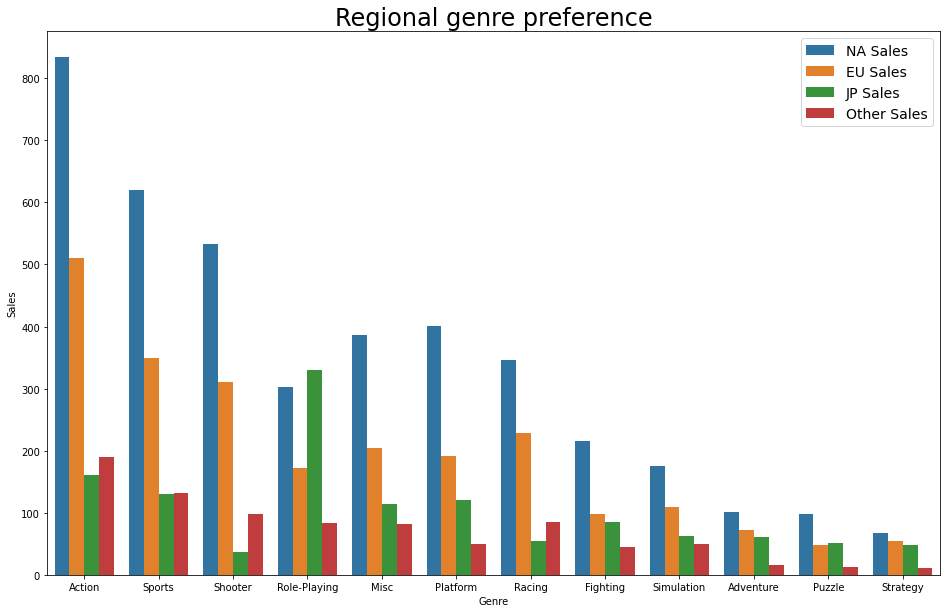

In [103]:
plt.figure(figsize=(16, 10))
sns.barplot(data=game_melted, x='Genre', y='Sales', hue='Countries')
plt.title('Regional genre preference', loc='center', fontsize=24)
plt.legend(fontsize=14)
plt.show()

북미와 유럽 지역에서는 Action과 Sports가 강세임을 볼 수 있고

일본에서만 유독 Role-Playing이 강세임을 볼 수 있다.

#### 2-1-1. 지역별 TOP3 장르

이를 좀 더 명확히 보기 위해서 지역별 강세 장르를 따로 표시해보자

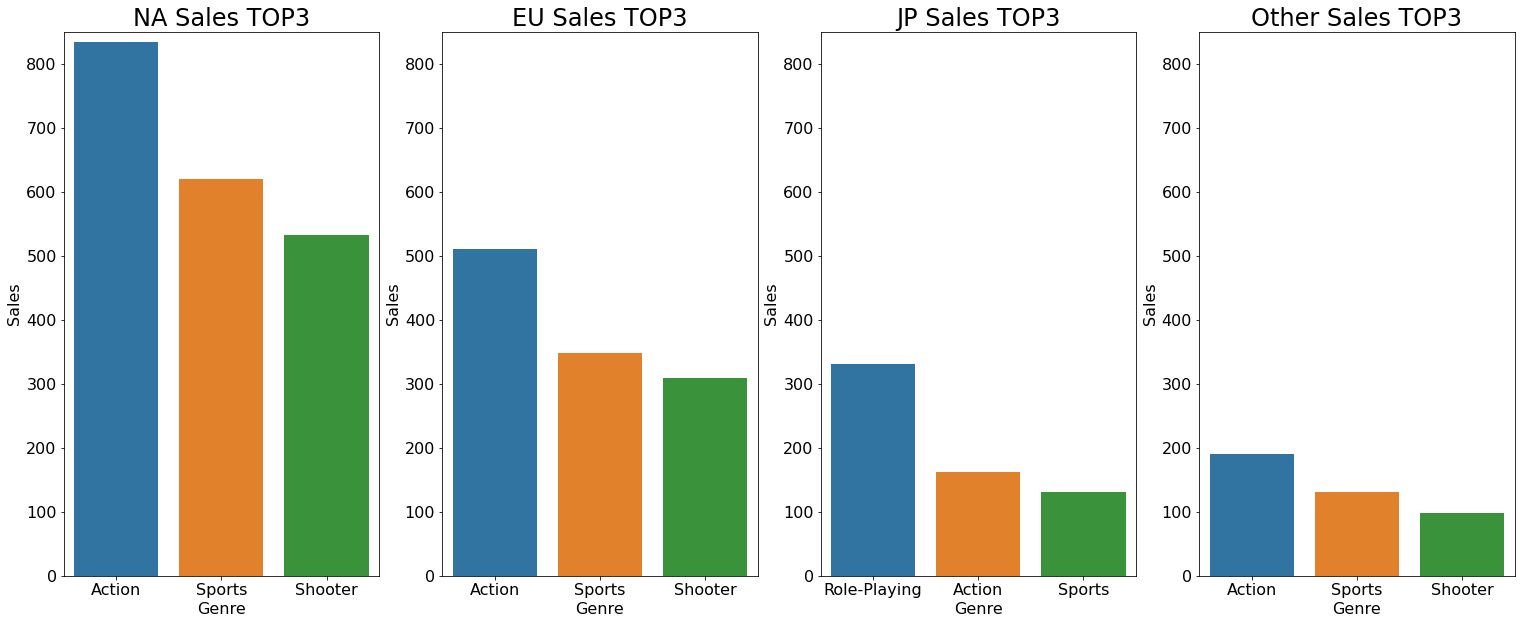

In [104]:
def top3_genre(df, sales_col):
    new_df = df.loc[:, ['Genre', sales_col]].sort_values(by=sales_col, ascending=False).reset_index(drop=True).head(3)
    new_df.columns = ['Genre', 'Sales']
    return new_df

# Top3 데이터 저장
na_genre_top3 = top3_genre(game_table, 'NA Sales')
eu_genre_top3 = top3_genre(game_table, 'EU Sales')
jp_genre_top3 = top3_genre(game_table, 'JP Sales')
other_genre_top3 = top3_genre(game_table, 'Other Sales')
# 데이터 리스트에 담기
data_list = [na_genre_top3, eu_genre_top3, jp_genre_top3, other_genre_top3]
columns_list = game_table.columns[1:]
# 막대 그래프 그리기
fig, axs = plt.subplots(figsize=(26, 10), nrows=1, ncols=4)

for col, i, data in zip(columns_list, range(len(columns_list)), data_list):
    axs[i].set_title(col + ' ' + 'TOP3', fontsize=24)
    sns.barplot(x='Genre', y='Sales', data=data, ax=axs[i])
    axs[i].tick_params(axis='both',labelsize=16)
    axs[i].set_xlabel('Genre', fontsize=16)
    axs[i].set_ylabel('Sales', fontsize=16)
    axs[i].set_ylim(0,850)
plt.show()

일본을 제외한 다른 지역에서는 Action, Sports, Shooter 순으로 장르 선호도가 분포한다.

일본은 Role-Playing이 강세이다.

#### 2-1-2. 연도별 출고량 트렌드

In [105]:
year_max_df = game.groupby(['Year', 'Genre']).size().reset_index(name='count')
year_max_idx = year_max_df.groupby(['Year'])['count'].transform(max) == year_max_df['count']
year_max_genre = year_max_df[year_max_idx].reset_index(drop=True)

In [106]:
year_max_genre = year_max_genre.drop_duplicates(subset=['Year','count'], keep='last').reset_index(drop=True)

In [119]:
genre = year_max_genre['Genre'].values

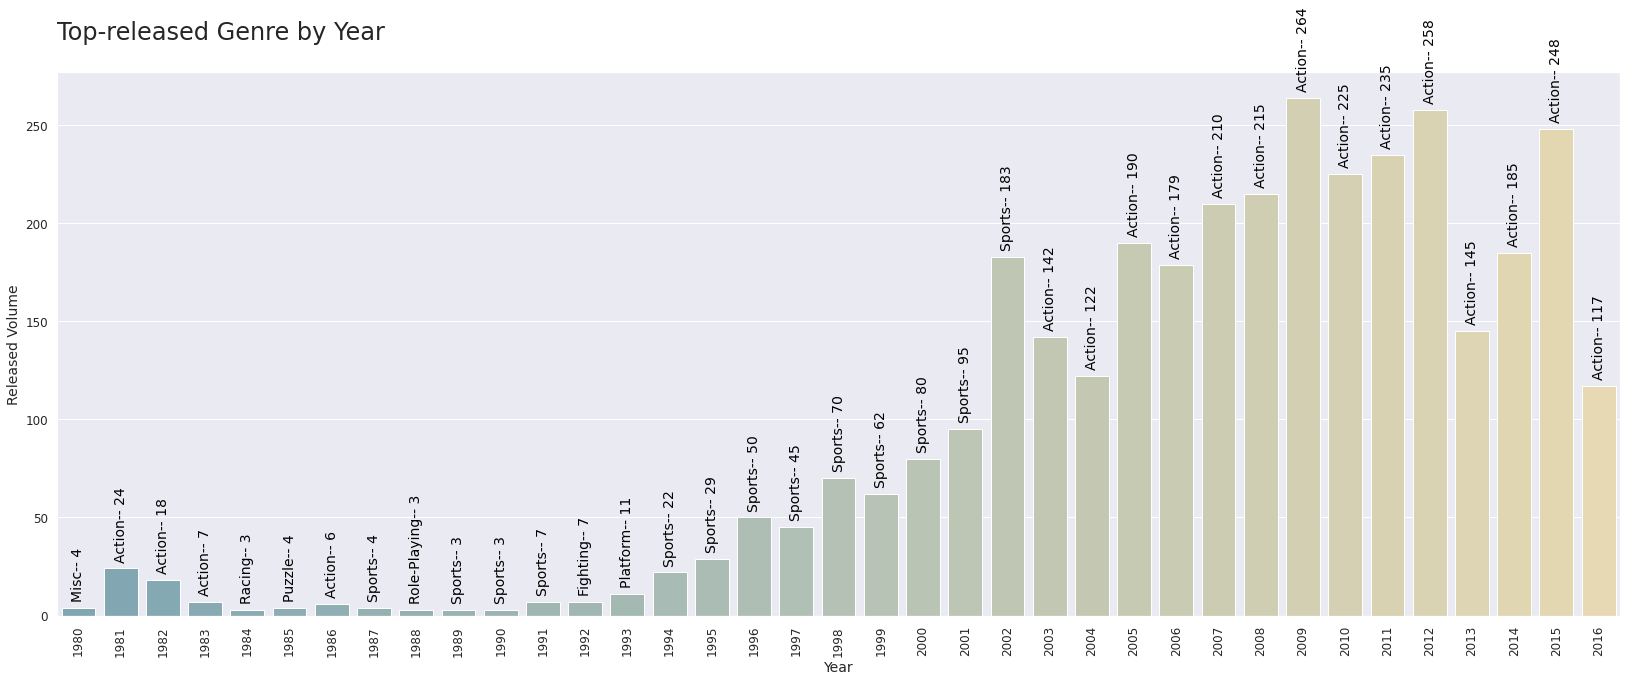

In [129]:
sns.set_context('notebook')
sns.set_style('darkgrid')


plt.figure(figsize=(28,10))
ax = sns.barplot(x='Year', y='count', data=year_max_genre, palette="blend:#7AB,#EDA")
idx = 0
for value in year_max_genre['count']:
    ax.text(x=idx, y=value + 5, s=str(genre[idx] + '--' + ' ' + str(value)),
            color='black', size=14, rotation=90, ha='center')
    idx += 1
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Released Volume', fontsize=14)
ax.set_title('Top-released Genre by Year', fontsize=24, y=1.05, loc='left')
plt.show()

1994년부터 Sports 게임들이 가장 많이 출시되다가 그 이후부터 2016년까지 Action 게임이 가장 많이 출시되고 있는 것을 확인할 수 있다.

#### 2-1-3. 연도별 판매량 트렌드

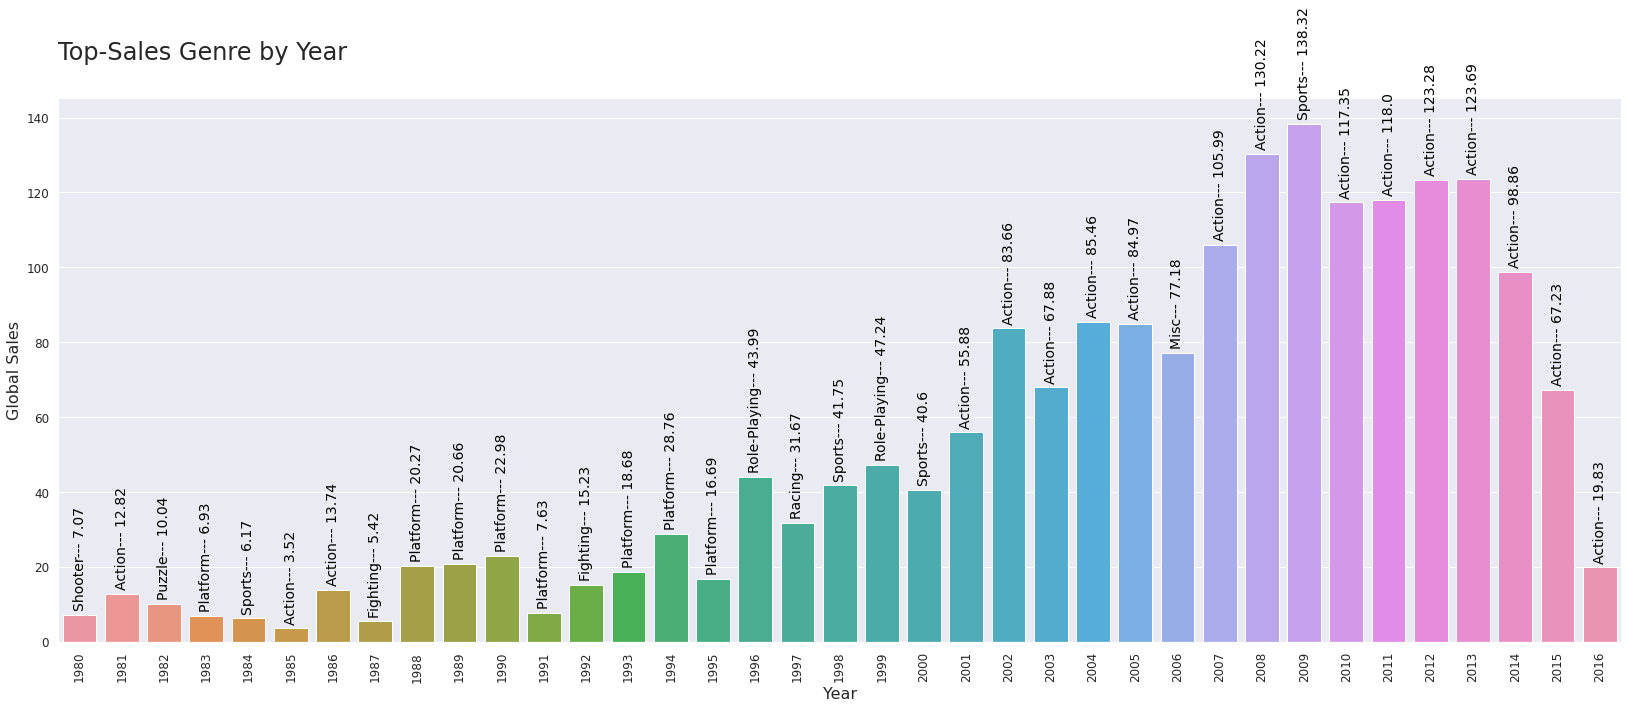

In [131]:
# 년도별 최고 판매량 기록한 장르 데이터프레임 만들기
year_max_sales = game.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index()
condition = year_max_sales['Global_Sales'] == year_max_sales.groupby(['Year'])['Global_Sales'].transform(max)
year_max_sales = year_max_sales[condition]
year_max_sales.columns = ['Year', 'Genre', 'Global Sales']

# 장르 데이터 저장
genre = year_max_sales['Genre'].values

# 그래프 그리기
plt.figure(figsize=(28,10))
ax = sns.barplot(x='Year', y='Global Sales', data=year_max_sales)
idx = 0
for value in year_max_sales['Global Sales']:
    ax.text(x=idx, y=value + 2, s=str(genre[idx] + '---' + ' ' + str(round(value, 2))),
            color='black', size=14, rotation=90, ha='center')
    idx += 1
ax.set_title('Top-Sales Genre by Year', fontsize=24, y=1.06, loc='left')
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Global Sales', fontsize=16)
plt.show()

출시량에 못지 않게 판매량도 Action이 최근 트렌드임을 알 수 있다.

#### 2-1-4. 장르별 출시량에 따른 판매량 트렌드

그렇다면 장르별 출시량에 따른 판매량은 어떻게 될까?

In [140]:
sales_per_release = game.groupby('Genre').mean().Global_Sales
s_p_r = pd.DataFrame(sales_per_release)
s_p_r = s_p_r.reset_index()
s_p_r.columns = ['Genre','Global Sales']

In [147]:
s_p_r = s_p_r.sort_values(ascending=False, by='Global Sales').reset_index(drop=True)

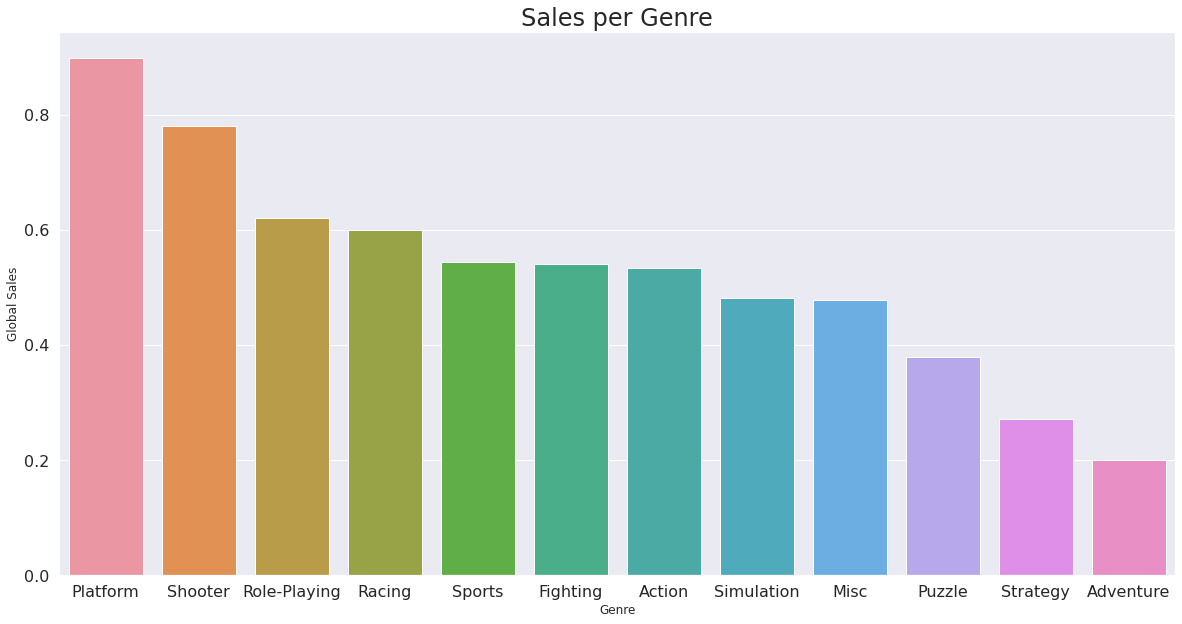

In [150]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x='Genre', y='Global Sales', data=s_p_r)
ax.set_title('Sales per Genre', fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

판매량, 출시량과는 다르게 가장 많이 팔리는 장르는 플랫폼 게임임을 알 수 있다.

### **2-2 플랫폼별 분석**

In [173]:
region_platform_sales = game.groupby('Platform').sum()[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']]

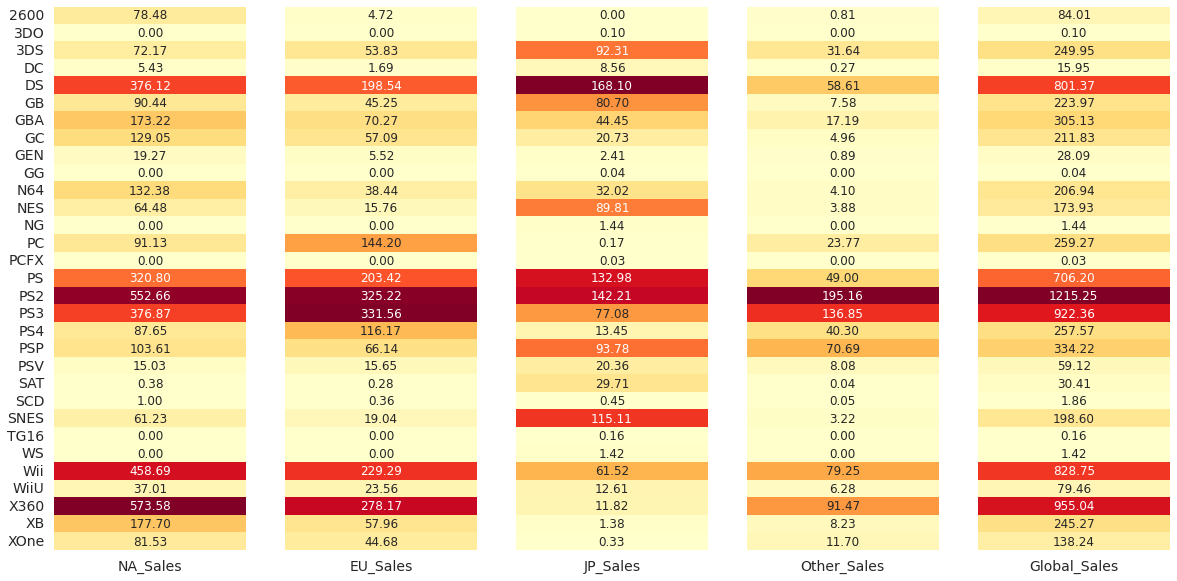

In [183]:
plt.figure(figsize=(20, 10))
plt.subplot(1,5,1)
a = sns.heatmap(region_platform_sales[['NA_Sales']], annot=True, fmt = '.2f', cmap="YlOrRd", cbar=False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
a.set_ylabel('', fontsize=12)

plt.subplot(1,5,2)
a = sns.heatmap(region_platform_sales[['EU_Sales']], annot=True, fmt = '.2f', cmap="YlOrRd", cbar=False, yticklabels=False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
a.set_ylabel('', fontsize=12)

plt.subplot(1,5,3)
a = sns.heatmap(region_platform_sales[['JP_Sales']], annot=True, fmt = '.2f', cmap="YlOrRd", cbar=False, yticklabels=False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
a.set_ylabel('', fontsize=12)

plt.subplot(1,5,4)
a = sns.heatmap(region_platform_sales[['Other_Sales']], annot=True, fmt = '.2f', cmap="YlOrRd", cbar=False, yticklabels=False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
a.set_ylabel('', fontsize=12)

plt.subplot(1,5,5)
a = sns.heatmap(region_platform_sales[['Global_Sales']], annot=True, fmt = '.2f', cmap="YlOrRd", cbar=False, yticklabels=False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
a.set_ylabel('', fontsize=12)
plt.show()

지역별 많은 게임이 팔린 플랫폼 TOP2


> 북미
*   PS2
*   X360

> 유럽
*   PS2
*   PS3

> 일본
*   DS
*   PS2

> 그 외 지역
*   PS2
*   PS3

> 전세계
*   PS2
*   X360

하지만 이 데이터만 보고 PS2와 X360에 게임을 출시해야겠다는 생각을 하면 안된다.
게임 기기(플랫폼)은 항상 발전하고 있기 때문이다.

아마 현재 가장 많은 게임이 출시되는 플랫폼은 위 데이터와는 다르게 PS4와 Xbox ONE 그리고 닌텐도 스위치 일 것이다.

최신 플랫폼으로는 PS5와 Xbox X가 있다.

따라서 다음 분기에 출시할 게임으로는 PS5와 Xbox X를 겨냥해야지 여기에 나와있는 구세대 게임기들을 대상으로 해서는 안될 것이다.

또한 위 플랫폼 데이터에는 PC(Personal Computer)에 대한 정보는 전혀 존재하지 않는다.

위 자료에 있는 PC는 슈퍼패미컴과 동세대 게임기인 PC Engine을 의미한다.

따라서 다음 분기에 출시할 플랫폼으로 콘솔 뿐만 아니라 PC 또한 고려해야 할 것이다.

## **3. Feature Extraction**

장르별 최고 출고량 게임

In [242]:
arr = pd.DataFrame()

In [253]:
for genre in game.Genre.unique():
  tmp_max = game.loc[game[game.Genre == genre].Global_Sales.idxmax(),:]
  arr = arr.append(tmp_max)

In [258]:
arr

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
3353,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
6583,Super Mario Land 2: 6 Golden Coins,GB,1992.0,Adventure,Nintendo,6.16,2.04,2.69,0.29,11.18
2906,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
6670,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
3228,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
10697,Nintendogs,DS,2005.0,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.75
7527,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
494,Brain Age 2: More Training in Minutes a Day,DS,2005.0,Puzzle,Nintendo,3.44,5.36,5.32,1.18,15.30
10044,"Warhammer 40,000: Dawn of War II - Chaos Rising",PC,2010.0,Strategy,THQ,0.08,10.00,0.00,0.01,10.09
14313,Super Smash Bros. Brawl,Wii,2008.0,Fighting,Nintendo,6.75,2.61,2.66,1.02,13.04


## **4. Conclusion**


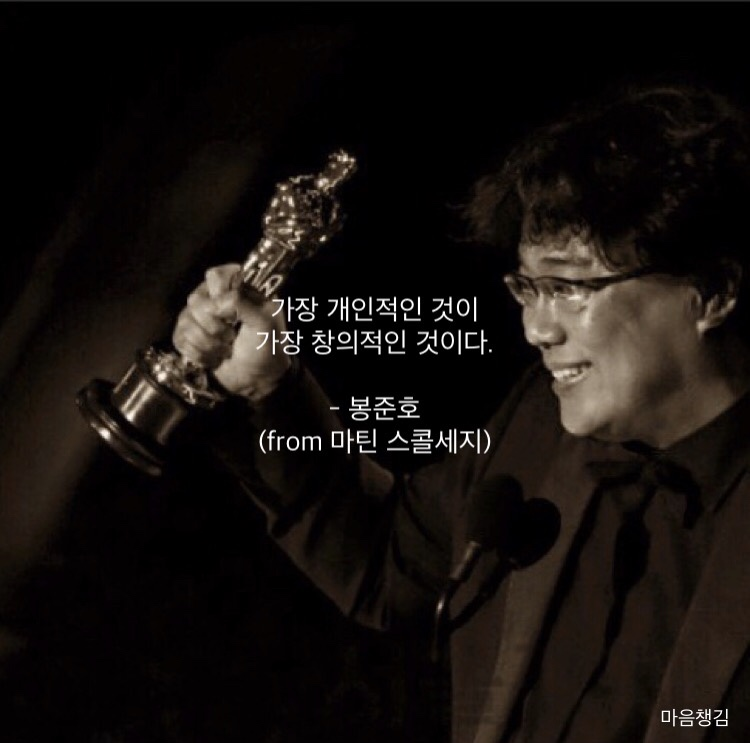

위에서 장르별, 플랫폼별 이런저런 분석들을 했지만 그것들은 '다음 분기에 어떤 게임을 만들 것인가?' 에 대한 해답을 주진 못하는 것 같다.

우리는 게임을 왜 하는가?


